# Forest Fires

### By Madhuri, Will, Jinnie, Emir, Tianze

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import datascience
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

%matplotlib inline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
forestfires_df = pd.read_csv("/kaggle/input/forest-fires-data-set/forestfires.csv")
forestfires_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


X - x-axis spatial coordinate within the Montesinho park map: 1 to 9

Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9

month - month of the year: 'jan' to 'dec'

day - day of the week: 'mon' to 'sun'

FFMC - FFMC index from the FWI system: 18.7 to 96.20

DMC - DMC index from the FWI system: 1.1 to 291.3

DC - DC index from the FWI system: 7.9 to 860.6

ISI - ISI index from the FWI system: 0.0 to 56.10

temp - temperature in Celsius degrees: 2.2 to 33.30

RH - relative humidity in %: 15.0 to 100

wind - wind speed in km/h: 0.40 to 9.40

rain - outside rain in mm/m2 : 0.0 to 6.4

area - the burned area of the forest (in ha): 0.00 to 1090.84

In [3]:
# In the Non-Null Count we can see that we have no missing values as there are already 517 entries total for each variable.
forestfires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [4]:
forestfires_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# EDA: Data cleaning

## Helper Functions

In [5]:
def get_season(month):
    if month in ['dec', 'jan', 'feb']:
        return 'winter'
    elif month in ['mar', 'apr', 'may']:
        return 'spring'
    elif month in ['jun', 'jul', 'aug']:
        return 'summer'
    else:
        return 'fall'

def get_risk(area):
    if area > 10:
        return 1
    else:
        return 0

In [6]:
mean = forestfires_df['area'].mean()
std = forestfires_df['area'].std()
mean, std

(12.847292069632493, 63.65581846794089)

## Count and Distribution Plots of categorical variables (days, months, and seasons)

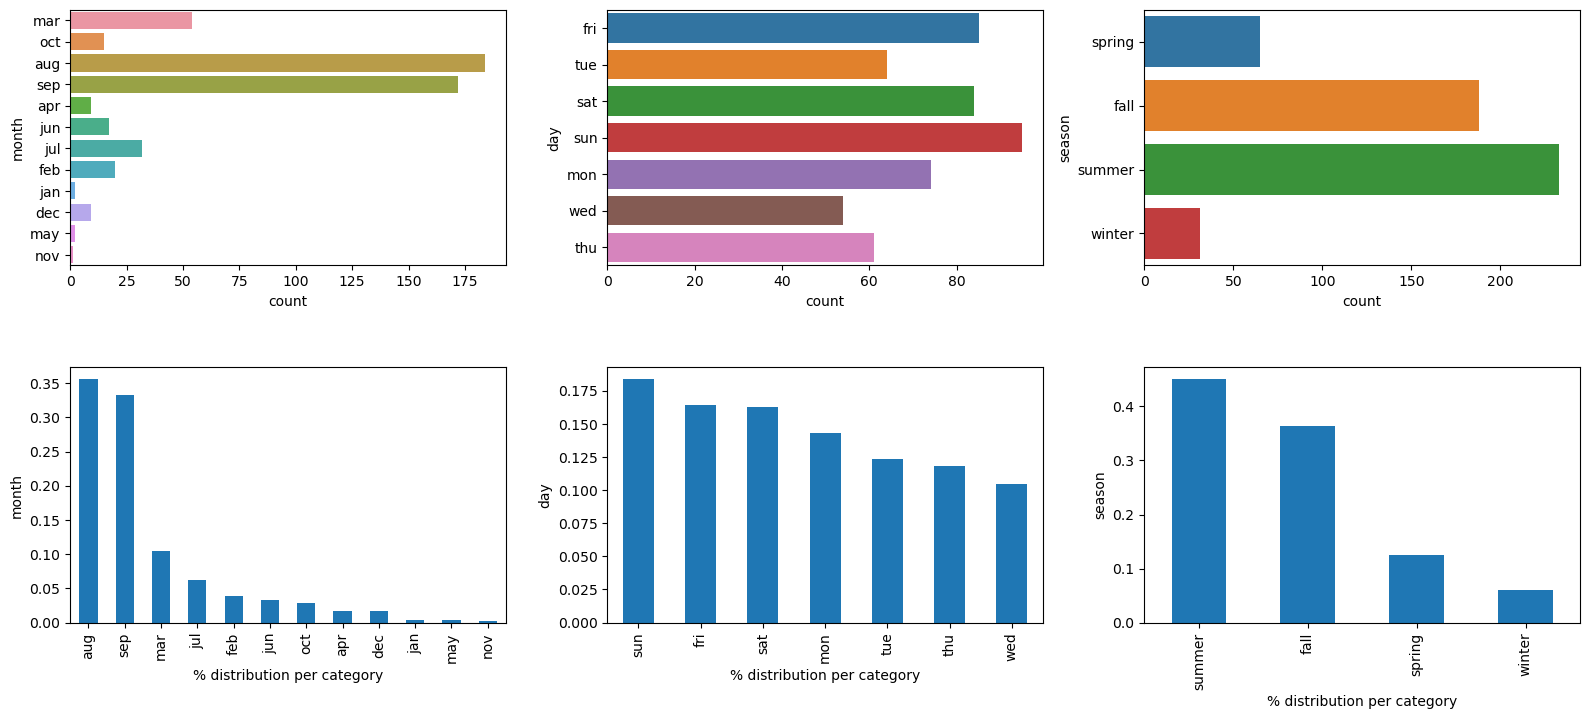

In [7]:
cat_dict = {'month': forestfires_df['month'],
           'day': forestfires_df['day'],
           'season': forestfires_df['month'].apply(get_season)}
cat_df = pd.DataFrame(cat_dict)
cat_columns = ['month', 'day', 'season']

# analyzing categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(3,3,i)
    sns.countplot(data=cat_df,y=col)
    plt.subplot(3,3,i+3)
    cat_df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  


## Visualizing Percentiles

### get a better sense of what we would consider a moderate/high-risk burned area

25th percentile: 0.0
50th percentile: 0.52
75th percentile: 6.57
90th percentile: 25.262000000000043
95th percentile: 48.713999999999984


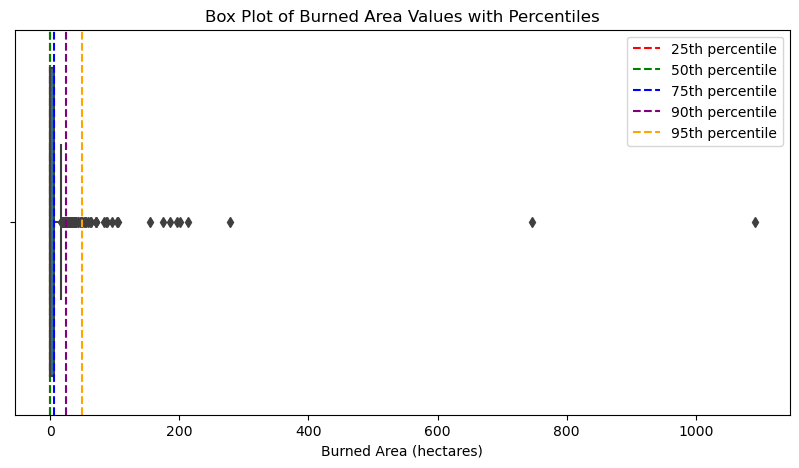

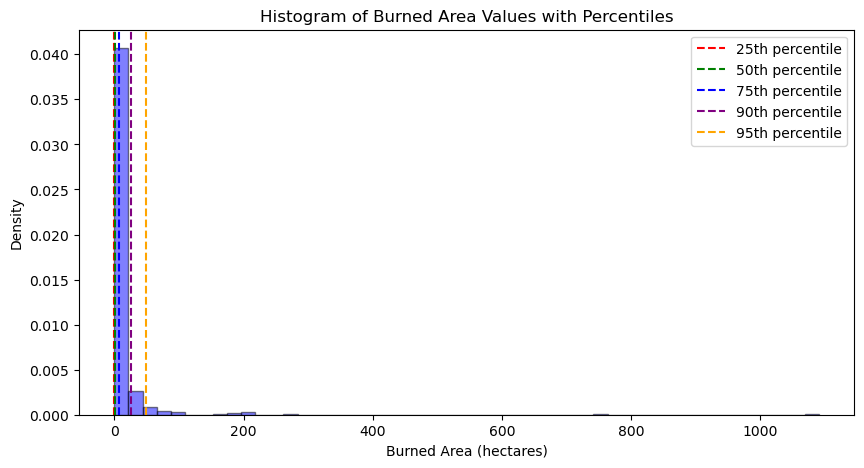

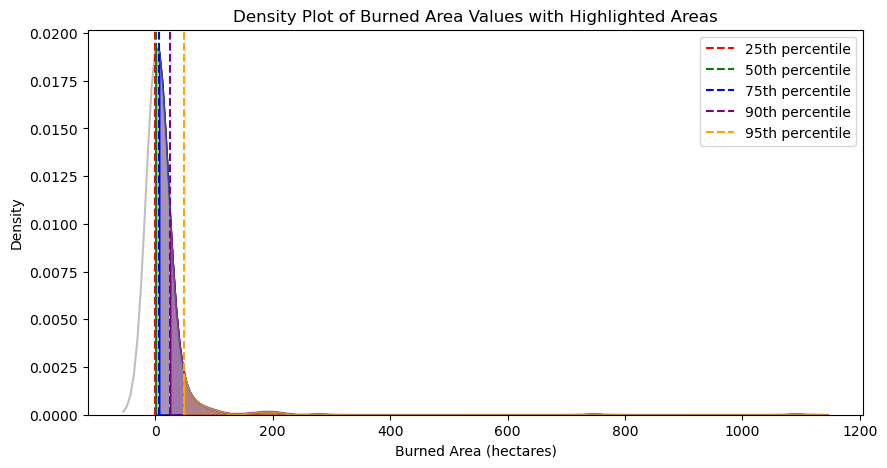

In [8]:
burned_area = forestfires_df['area']

percentiles = [25, 50, 75, 90, 95]
percentile_values = np.percentile(burned_area, percentiles)

# Display percentile values
for i, p in enumerate(percentiles):
    print(f"{p}th percentile: {percentile_values[i]}")

colors = ['red', 'green', 'blue', 'purple', 'orange']

# Create a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=burned_area)
for p, value, color in zip(percentiles, percentile_values, colors):
    plt.axvline(value, color=color, linestyle='--', label=f'{p}th percentile')
plt.xlabel('Burned Area (hectares)')
plt.legend()
plt.title('Box Plot of Burned Area Values with Percentiles')
plt.show()

# Create a custom percentile plot
plt.figure(figsize=(10, 5))
plt.hist(burned_area, bins=50, color='blue', edgecolor='black', alpha=0.5, density=True)
for p, value, color in zip(percentiles, percentile_values, colors):
    plt.axvline(value, color=color, linestyle='--', label=f'{p}th percentile')
plt.xlabel('Burned Area (hectares)')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of Burned Area Values with Percentiles')
plt.show()

# Create a custom density plot with colored dashed lines and highlighted areas
plt.figure(figsize=(10, 5))
sns.kdeplot(burned_area, fill=False, color='gray', alpha=0.5)

for p, value, color in zip(percentiles, percentile_values, colors):
    plt.axvline(value, color=color, linestyle='--', label=f'{p}th percentile')
    sns.kdeplot(burned_area, fill=True, clip=(value, np.inf), color=color, alpha=0.2)

plt.xlabel('Burned Area (hectares)')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plot of Burned Area Values with Highlighted Areas')
plt.show()

## Visualizing 10 hectares of burned area (moderate/high risk) in our dataset and finding its percentile

The value 10 is at the 81.92th percentile.


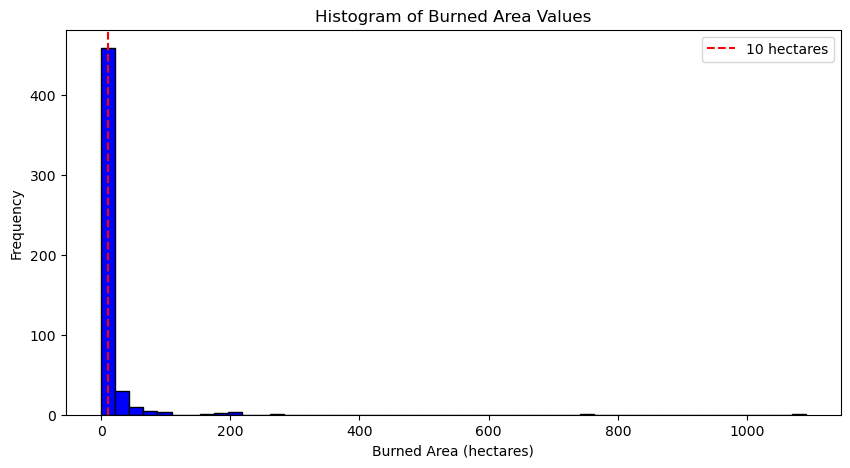

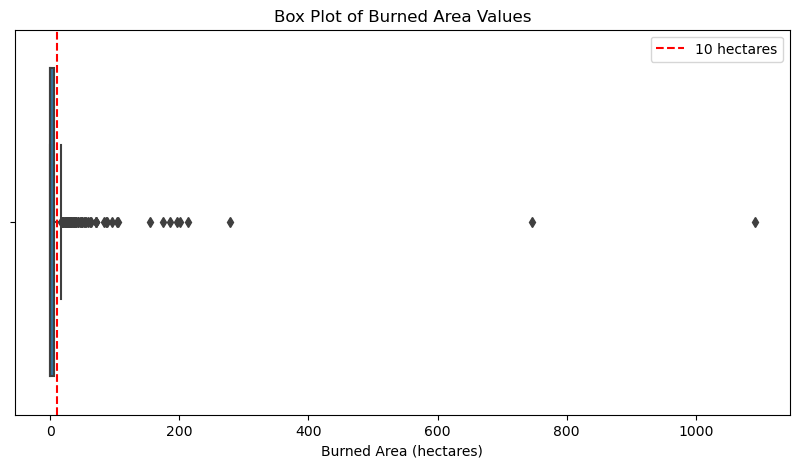

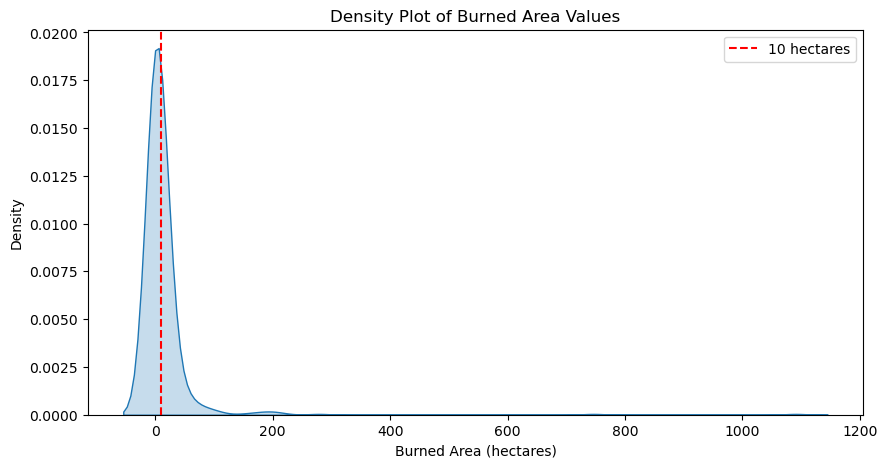

In [9]:
# Calculate the percentiles for 0 to 100
percentiles = np.arange(0, 101)
percentile_values = np.percentile(burned_area, percentiles)

# Find the percentile for the value 10 using interpolation
value = 10
percentile_10 = np.interp(value, percentile_values, percentiles)
print(f"The value 10 is at the {percentile_10:.2f}th percentile.")

# Create a histogram
plt.figure(figsize=(10, 5))
plt.hist(burned_area, bins=50, color='blue', edgecolor='black')
plt.axvline(10, color='red', linestyle='--', label='10 hectares')
plt.xlabel('Burned Area (hectares)')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Burned Area Values')
plt.show()

# Create a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=burned_area)
plt.axvline(10, color='red', linestyle='--', label='10 hectares')
plt.xlabel('Burned Area (hectares)')
plt.legend()
plt.title('Box Plot of Burned Area Values')
plt.show()

# Create a density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(burned_area, fill=True)
plt.axvline(10, color='red', linestyle='--', label='10 hectares')
plt.xlabel('Burned Area (hectares)')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plot of Burned Area Values')
plt.show()

## Categorical Variable Conversion

### Heatmaps

In [10]:
forestfires_df['high risk']  = forestfires_df['area'].apply(get_risk)
forestfires_df['season'] = forestfires_df['month'].apply(get_season)

# Calculate the correlation matrix
subdf = forestfires_df[['high risk', 'area', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'day', 'month', 'season']]
corr_matrix = subdf.corr()

In [11]:
import plotly.subplots as sp

# Create a subplot with heatmap
fig = sp.make_subplots(rows=1, cols=1)
heatmap = go.Heatmap(z=corr_matrix, x=corr_matrix.columns, y=corr_matrix.columns, colorscale='RdBu_r', zmin=-1, zmax=1)
fig.add_trace(heatmap)

# Add annotations for the correlation values
for i, row in enumerate(corr_matrix.index):
    for j, col in enumerate(corr_matrix.columns):
        fig.add_annotation(go.layout.Annotation(text=f"{corr_matrix.iloc[i, j]:.2f}", x=col, y=row, showarrow=False, font=dict(size=12)))

# Customize the plot layout
fig.update_layout(title='Correlation Matrix Heatmap', xaxis_title='Variables', yaxis_title='Variables')

# Show the plot
fig.show()

In [12]:
subdf.corr()['high risk'].sort_values(ascending=False)

high risk    1.000000
area         0.374235
wind         0.076253
rain         0.073343
DC           0.041188
DMC          0.036095
FFMC         0.014812
temp         0.013714
ISI         -0.018922
RH          -0.040864
Name: high risk, dtype: float64

## Distributions

In [13]:
# Low correlation scores suggests that there may not be strong linear relationships between the variables.
# Use scatterplot to see other relationship
subdf_scatter = forestfires_df[['high risk', 'area', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']]

custom_colors = {'0': 'turquoise', '1': 'orangered'}


fig = px.scatter_matrix(subdf_scatter, 
                        color='high risk', 
                        dimensions=['area', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'], 
                        title='Scatter Plot Matrix of Features', 
                        opacity=0.5,
                        hover_name=['high risk' if hr == 1 else 'low risk' for hr in subdf['high risk']])

fig.update_traces(marker=dict(color=[custom_colors[str(hr)] for hr in subdf['high risk']]))


# Customize the plot layout
fig.update_layout(height=1000, width=1000)

# Show the plot
fig.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/numeric.py:2446: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



# Logistic Regression

In [14]:
def standardize(df, lst):
    for var in lst:
        df[var+'_sd'] = (df[var] - np.mean(df[var])) / np.std(df[var])

In [15]:
# Count the instances for the first bar graph (0 vs. more than 0)
area_zero_count = (forestfires_df['area'] == 0).sum()
area_more_than_zero_count = (forestfires_df['area'] > 0).sum()

# Create the first bar graph with different colors
fig1 = go.Figure(go.Bar(x=['Area = 0', 'Area > 0'], y=[area_zero_count, area_more_than_zero_count], marker_color=['blue', 'orange']))
fig1.update_layout(title='Number of Instances with Area Equal to 0 vs. More Than 0', xaxis_title='Area Groups', yaxis_title='Count')

# Count the instances for the second bar graph (10 or greater vs. less than 10)
area_less_than_ten_count = (forestfires_df['area'] < 10).sum()
area_ten_or_greater_count = (forestfires_df['area'] >= 10).sum()

# Create the second bar graph with different colors
fig2 = go.Figure(go.Bar(x=['Area < 10', 'Area >= 10'], y=[area_less_than_ten_count, area_ten_or_greater_count], marker_color=['blue', 'orange']))
fig2.update_layout(title='Number of Instances with Area Less Than 10 vs. 10 or Greater', xaxis_title='Area Groups', yaxis_title='Count')

# Show the bar graphs
fig1.show()
fig2.show()

In [16]:
one_hot_encoded = pd.get_dummies(forestfires_df['season'], prefix='season')
forestfires_encoded = pd.concat([forestfires_df, one_hot_encoded], axis=1)
forestfires_encoded.drop('season', axis=1, inplace=True)

standardize(forestfires_encoded, ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])
forestfires_encoded

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,season_winter,FFMC_sd,DMC_sd,DC_sd,ISI_sd,temp_sd,RH_sd,wind_sd,rain_sd,area_sd
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,...,0,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,...,0,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,0,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,0,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,...,0,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,...,0,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,...,0,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,...,0,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020


In [17]:
# Calculate the correlation matrix for all features
all_features = ['high risk', 'area', 'FFMC_sd', 'DMC_sd', 'DC_sd', 'ISI_sd', 'temp_sd', 'RH_sd', 'wind_sd', 'rain_sd']
correlation_matrix_all = forestfires_encoded[all_features].corr()

# Create the heatmap
fig_all = ff.create_annotated_heatmap(
    z=correlation_matrix_all.values,
    x=list(correlation_matrix_all.columns),
    y=list(correlation_matrix_all.index),
    colorscale='RdBu_r',
    annotation_text=correlation_matrix_all.round(2).values,
    showscale=True
)

# Update the layout
fig_all.update_layout(
    title='Correlation Heatmap of All Forest Fires Features',
    xaxis=dict(title='Features', side='bottom'),
    yaxis=dict(title='Features'),
)

# Show the heatmap
fig_all.show()

In [18]:
train, test = train_test_split(forestfires_encoded, test_size=0.2, random_state=42)

# Split the data into features and labels
X_train = train[['season_summer', 'season_fall', 'season_winter', 'season_spring', 'FFMC_sd', 'DC_sd', 'temp_sd', 'RH_sd', 'wind_sd', 'rain_sd']]
Y_train = train['high risk']

X_test = test[['season_summer', 'season_fall', 'season_winter', 'season_spring', 'FFMC_sd','DC_sd', 'temp_sd', 'RH_sd', 'wind_sd', 'rain_sd']]
Y_test = test['high risk']

lr = LogisticRegression(fit_intercept=True, solver='lbfgs')
lr.fit(X_train, Y_train)

LogisticRegression()

In [19]:
train_prob = lr.predict_proba(X_train)
test_prob = lr.predict_proba(X_test)

threshold = 0.15

train_predictions_w_threshold = (train_prob[:, 1] >= threshold).astype(int)
test_predictions_w_threshold = (test_prob[:, 1] >= threshold).astype(int)

train_accuracy = np.sum(train_predictions_w_threshold == Y_train) / len(train_predictions_w_threshold)
test_accuracy = np.sum(test_predictions_w_threshold == Y_test) / len(test_predictions_w_threshold)

print(f"Train accuracy with threshold {threshold}: {train_accuracy:.4f}")
print(f"Test accuracy with threshold {threshold}: {test_accuracy:.4f}")

Train accuracy with threshold 0.15: 0.4044
Test accuracy with threshold 0.15: 0.4712


In [20]:
TP = np.sum((test_predictions_w_threshold == Y_test ) & (Y_test == 1))
TP

18

In [21]:
FP = np.sum((test_predictions_w_threshold == 1) & (Y_test == 0))
FP

52

In [22]:
TN = np.sum((test_predictions_w_threshold == Y_test) & (Y_test == 0))
TN

31

In [23]:
FN = np.sum((test_predictions_w_threshold == 0) & (Y_test == 1))
FN

3

In [24]:
Recall = TP / (TP + FN)
Recall

0.8571428571428571

In [25]:
Precision = TP / (TP + FP)
Precision

0.2571428571428571

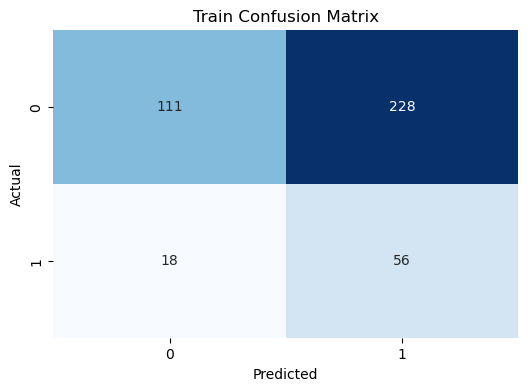

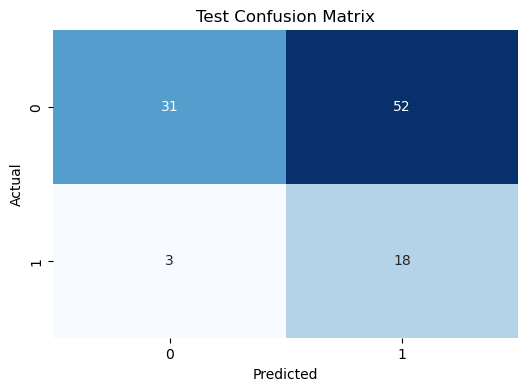

In [26]:
# Calculate confusion matrices
train_confusion_matrix = confusion_matrix(Y_train, train_predictions_w_threshold)
test_confusion_matrix = confusion_matrix(Y_test, test_predictions_w_threshold)

# Plot the train confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(train_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the test confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(test_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=edf7896e-de88-41df-b676-4d01eac89b73' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>